In [55]:
import pickle
import numpy as np

In [56]:
with open ("/kaggle/input/dataset/test_qa220120145430-220818-175426.txt","rb") as fp:
  test_data=pickle.load(fp)

In [57]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [58]:
with open ("/kaggle/input/dataset/train_qa220120145526-220818-175522.txt","rb") as fp1:
  train_data=pickle.load(fp1)

In [59]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [60]:
len(train_data)
len(test_data)

1000

In [61]:
vocab= set()
all_data=test_data+train_data
for story,question,ans in all_data:
   vocab=vocab.union(set(story))
   vocab=vocab.union(set(question))

In [62]:
vocab.add('yes')
vocab.add('no')

In [63]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [64]:
len(vocab)

37

In [65]:
vocab_len=len(vocab)+1

In [66]:
max_story_len=max([len(data[0]) for data in all_data])
max_story_len

156

In [67]:
max_ques_len=max([len(data[1]) for data in all_data])
max_ques_len

6

In [68]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [69]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [70]:
tokenizer.word_index

{'down': 1,
 'john': 2,
 'took': 3,
 'mary': 4,
 'is': 5,
 'travelled': 6,
 '.': 7,
 'there': 8,
 'milk': 9,
 'discarded': 10,
 'kitchen': 11,
 'picked': 12,
 'yes': 13,
 'grabbed': 14,
 'hallway': 15,
 'garden': 16,
 'left': 17,
 'bathroom': 18,
 'journeyed': 19,
 'office': 20,
 '?': 21,
 'apple': 22,
 'bedroom': 23,
 'moved': 24,
 'dropped': 25,
 'put': 26,
 'daniel': 27,
 'in': 28,
 'got': 29,
 'went': 30,
 'the': 31,
 'back': 32,
 'football': 33,
 'up': 34,
 'no': 35,
 'to': 36,
 'sandra': 37}

In [71]:
train_story_text=[]
train_ques_text=[]
train_ans=[]
for story,ques,ans in train_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
    train_ans.append(ans)

In [72]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [73]:
train_story_seq

[[4, 24, 36, 31, 18, 7, 37, 19, 36, 31, 23, 7],
 [4,
  24,
  36,
  31,
  18,
  7,
  37,
  19,
  36,
  31,
  23,
  7,
  4,
  30,
  32,
  36,
  31,
  23,
  7,
  27,
  30,
  32,
  36,
  31,
  15,
  7],
 [4,
  24,
  36,
  31,
  18,
  7,
  37,
  19,
  36,
  31,
  23,
  7,
  4,
  30,
  32,
  36,
  31,
  23,
  7,
  27,
  30,
  32,
  36,
  31,
  15,
  7,
  37,
  30,
  36,
  31,
  11,
  7,
  27,
  30,
  32,
  36,
  31,
  18,
  7],
 [4,
  24,
  36,
  31,
  18,
  7,
  37,
  19,
  36,
  31,
  23,
  7,
  4,
  30,
  32,
  36,
  31,
  23,
  7,
  27,
  30,
  32,
  36,
  31,
  15,
  7,
  37,
  30,
  36,
  31,
  11,
  7,
  27,
  30,
  32,
  36,
  31,
  18,
  7,
  27,
  12,
  34,
  31,
  33,
  8,
  7,
  27,
  30,
  36,
  31,
  23,
  7],
 [4,
  24,
  36,
  31,
  18,
  7,
  37,
  19,
  36,
  31,
  23,
  7,
  4,
  30,
  32,
  36,
  31,
  23,
  7,
  27,
  30,
  32,
  36,
  31,
  15,
  7,
  37,
  30,
  36,
  31,
  11,
  7,
  27,
  30,
  32,
  36,
  31,
  18,
  7,
  27,
  12,
  34,
  31,
  33,
  8,
  7,
  27,


In [74]:
def vectorize_data(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_ques_len=max_ques_len):
    X=[]
    Xq=[]
    Y=[]
    for story,ques,ans in data:
        x=[word_index[word.lower()]for word in story]
        xq=[word_index[word.lower()]for word in ques]
        y=np.zeros(len(word_index)+1)
        y[word_index[ans]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_ques_len),np.array(Y))

In [75]:
inputs_train,queries_train,answers_train=vectorize_data(train_data)

In [76]:
inputs_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         4, 24, 36, 31, 18,  7, 37, 19, 36, 31, 23,  7]], dtype=int32)

In [77]:
queries_train

array([[ 5, 37, 28, 31, 15, 21]], dtype=int32)

In [78]:
inputs_test,queries_test,answers_test=vectorize_data(test_data)

In [79]:
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,Concatenate,add,dot,LSTM

In [80]:
input_sequence=Input((max_story_len,))
question=Input((max_ques_len,))

In [81]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.2))

In [82]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.2))

In [83]:
ques_encoder=Sequential()
ques_encoder.add(Embedding(input_dim=vocab_len,input_length=max_ques_len,output_dim=64))
ques_encoder.add(Dropout(0.2))

In [84]:
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
ques_encoded=ques_encoder(question)

In [85]:
match=dot([input_encoded_m,ques_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [86]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [87]:
answer=Concatenate()([response,ques_encoded])

In [88]:
answer=LSTM(32)(answer)

In [89]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_len)(answer)
answer=Activation('softmax')(answer)

In [90]:
model=Model([input_sequence,question],answer)
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [91]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, None, 64)             2432      ['input_3[0][0]']             
                                                                                                  
 sequential_5 (Sequential)   (None, 6, 64)                2432      ['input_4[0][0]']             
                                                                                            

In [92]:
history = model.fit([inputs_train, queries_train], answers_train, validation_data=([inputs_test, queries_test], answers_test), batch_size=30, epochs=15)
print(history.history)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 3.6188 - accuracy: 0.0000e+00 - val_loss: 3.3243 - val_accuracy: 1.0000
Epoch 2/15
1/1 [==============================] - 0s 42ms/step - loss: 3.4320 - accuracy: 0.0000e+00 - val_loss: 3.1058 - val_accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 0s 39ms/step - loss: 3.2454 - accuracy: 1.0000 - val_loss: 2.9496 - val_accuracy: 1.0000
Epoch 4/15
1/1 [==============================] - 0s 44ms/step - loss: 2.7449 - accuracy: 1.0000 - val_loss: 2.7315 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 0s 42ms/step - loss: 2.6230 - accuracy: 1.0000 - val_loss: 2.5285 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 0s 39ms/step - loss: 1.9941 - accuracy: 1.0000 - val_loss: 2.2855 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 40ms/step - loss: 2.3803 - accuracy: 1.0000 - val_loss: 2.1340 - val_accuracy: 1.0000
Epoch 8/15
1/1 [=====

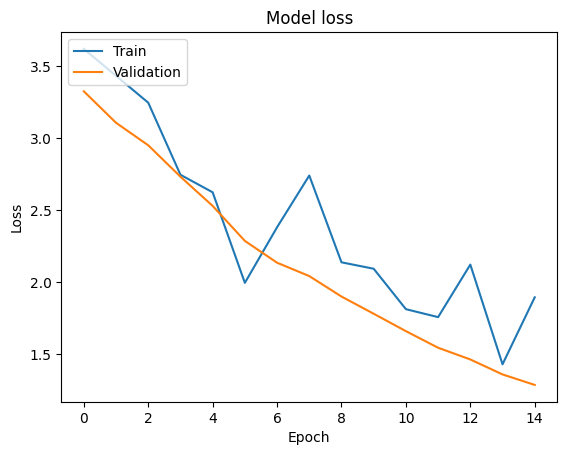

In [93]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [94]:
# import matplotlib.pyplot as plt
# print(history.history.keys())
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title("Model Accuracy")
# plt.xlabel("Accuracy")
# plt.ylabel("epochs")